In [1]:
%store -r udp_norm
%store -r tcp_norm
%store -r dropped_columns_full
%store -r dropped_columns_full2
%store -r Udp_protocol2

In [2]:
dropped_columns_full2

,ts,uid,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CDe43c1PtgynajGI6,tcp,-,2.998796,0,0,S0,3.0,180.0,0.0,0.0,PortScan
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan
2,1.525880e+09,CMBrup3BLXivSp4Avc,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,tcp,-,2.998804,0,0,S0,3.0,180.0,0.0,0.0,Benign
4,1.525880e+09,C7USrA15nFVkniMqC5,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,CMeH6R2aua5c5Dd65a,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444670,1.532526e+09,CvqGx33hsXDpDVXa1i,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444671,1.532526e+09,CC83RoUd9RLFuTL81,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444672,1.532526e+09,C4ISld2cuSukEEuQtk,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan


In [3]:
from sklearn.cluster import KMeans
from numpy import unique
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [4]:
def fulldata(dropped_columns_full):
    dropped_columns_full['service']= dropped_columns_full['service'].replace('-', np.NaN)
    dropped_columns_full['duration']= dropped_columns_full['duration'].replace('-', np.NaN)
    dropped_columns_full['orig_bytes']= dropped_columns_full['orig_bytes'].replace('-', np.NaN)
    dropped_columns_full['resp_bytes']= dropped_columns_full['resp_bytes'].replace('-', np.NaN)
    
    return dropped_columns_full


In [5]:
fulldata_analysis= fulldata(dropped_columns_full)

In [6]:
def fulldata_analysisnan(fulldata_analysis):
    fulldata_analysis['orig_bytes'] =fulldata_analysis['orig_bytes'].replace(np.nan, 0)
    fulldata_analysis['resp_bytes'] = fulldata_analysis['resp_bytes'].replace(np.nan, 0)
    fulldata_analysis['duration'] = fulldata_analysis['duration'].replace(np.nan, 0)
    fulldata_analysis['service'] = fulldata_analysis['service'].replace(np.nan, 0)
    return fulldata_analysis

In [7]:
nanreplace_zero= fulldata_analysisnan(fulldata_analysis)

In [8]:
le1 = LabelEncoder()
def fulldatalabelenc(nanreplace_zero):
    nanreplace_zero['uid']=le1.fit_transform(nanreplace_zero['uid'])
    nanreplace_zero['proto']=le1.fit_transform(nanreplace_zero['proto'])
    nanreplace_zero['conn_state']=le1.fit_transform(nanreplace_zero['conn_state'])
    return nanreplace_zero

In [9]:
fulldatalabelencod=fulldatalabelenc(nanreplace_zero)


In [10]:
fulldatadfselected= fulldatalabelencod[['duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'orig_pkts', 'resp_pkts']]


In [11]:
def objecttoint(fulldatadfselected):
    Copyfulldfselected=fulldatadfselected.copy()
    Copyfulldfselected['orig_bytes'] = pd.to_numeric(Copyfulldfselected['resp_bytes'],errors = 'coerce')
    Copyfulldfselected['duration'] = pd.to_numeric(Copyfulldfselected['duration'],errors = 'coerce')
    Copyfulldfselected['resp_bytes'] = pd.to_numeric(Copyfulldfselected['resp_bytes'],errors = 'coerce')

    return Copyfulldfselected

In [12]:
objecttoint=objecttoint(fulldatadfselected)

In [13]:
objecttoint.dtypes

duration      float64
orig_bytes      int64
resp_bytes      int64
conn_state      int64
orig_pkts     float64
resp_pkts     float64
dtype: object

In [14]:
fullcols = objecttoint.columns
zfull = objecttoint.values
def fullnorm(fullcols, zfull):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(zfull)
    fullnormalized = pd.DataFrame(x_scaled, columns = fullcols )
    return fullnormalized

In [15]:
fullpreprocess=fullnorm(fullcols, zfull)

In [16]:
wss = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(fullpreprocess)
    wss.append(kmeans.inertia_)
   

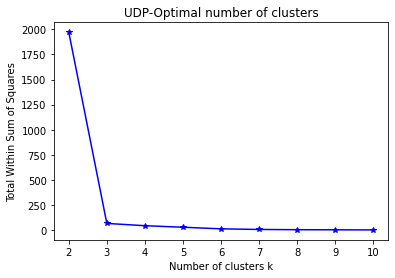

In [17]:
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("UDP-Optimal number of clusters")
plt.show()

In [18]:
def kmeancluster(cluster):
    
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    label = kmeans.fit_predict(fullpreprocess)
    centers = np.array(kmeans.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    dropped_columns_full2['clusterlabel']= kmeans.labels_
    seedfsd1= dropped_columns_full2[['label', 'clusterlabel']]
    ax = plt.axes()
    
    sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax.set_title('Kmeans-clustering fulldata Comparison of clusters and labels after K-means clustering algorithm'+ "-"  + str(cluster))
    plt.xticks(rotation=90)
                 
    return

    

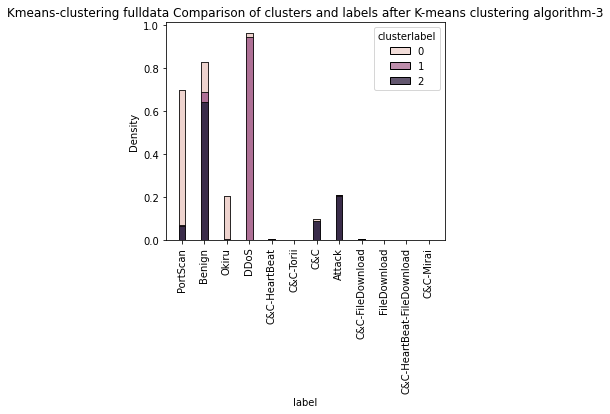

In [19]:
kmeancluster(3)

In [ ]:
tcp[Udp_protocol2['cluster'] == 2]['label'].value_counts(normalize=True) * 100


In [20]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#reduced_features = pca.fit_transform(udp_norm)
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(fullpreprocess)
def kmeancluster(cluster):
    
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    label = kmeans.fit_predict(reduced_features)
    centers = np.array(kmeans.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    fullpreprocess['label'] = label
    ax = plt.axes()

    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
    ax.set_title('Full-Kmeans + PCA algorithms plot cluster'+ "-"  + str(cluster))
    plt.xlabel([])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    
    return 

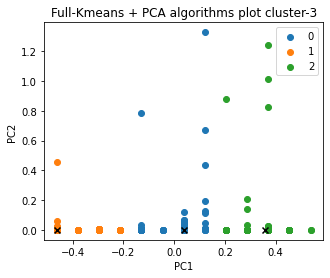

In [21]:
kmeancluster(3)

In [ ]:
kmeancluster(5)

In [ ]:
'''
algorithm3 = KMeans(n_clusters = 5, init='k-means++',  random_state=123)
algorithm3.fit(udp_norm)
Udp_protocol2['clusterlabel']= algorithm3.labels_


'''

In [ ]:
#seedfsd1= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
#seedfsd.to_csv('ad.csv')

In [ ]:
'''

ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Kmeans-UDP-Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)



'''

### Birch algorithms for fulldata protocol

In [22]:

def birch(cluster):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(fullpreprocess)
    yhat_br = model_br.predict(fullpreprocess)
    clusters_br = unique(yhat_br)
    dropped_columns_full2['clusterlabel'] = model_br.labels_
    seedfsd3= dropped_columns_full2[['label', 'clusterlabel']]
    ax = plt.axes()
    sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax.set_title('Fulldata-Comparison of clusters and labels after Birch clustering')
    plt.xticks(rotation=90)
    return

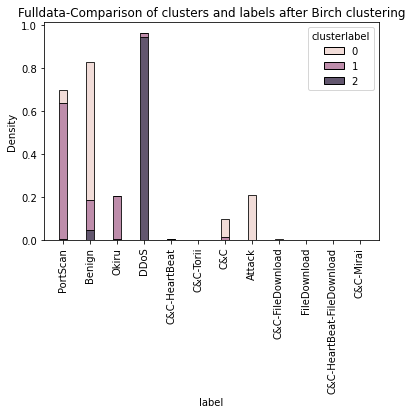

In [23]:
birch(3)

In [24]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(fullpreprocess)
def brichcluster(cluster):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(fullpreprocess)
    label =  model_br.predict(fullpreprocess)
    #centers = np.array( model_br.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    ax = plt.axes()

    #Udp_protocol2['clusterlabel']= model_br.predict(udp_norm)
    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    #plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

    plt.xlabel([])
    ax.set_title('fulldata-Birch + PCA algorithms plot cluster'+ "-"  + str(cluster))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    return 

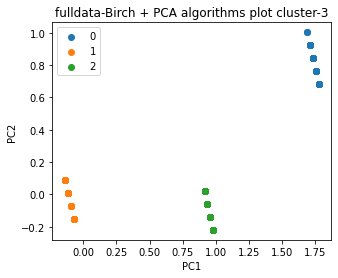

In [25]:
brichcluster(3)

In [ ]:
birch(4)

In [ ]:
birch(5)

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udp_norm)
def brichcluster(cluster):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(udp_norm)
    label =  model_br.predict(udp_norm)
    #centers = np.array( model_br.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    ax = plt.axes()

    #Udp_protocol2['clusterlabel']= model_br.predict(udp_norm)
    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    #plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

    plt.xlabel([])
    ax.set_title('UDP-Birch + PCA algorithms plot cluster'+ "-"  + str(cluster))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    return 

In [ ]:
brichcluster(2)

In [ ]:
brichcluster(3)

In [ ]:
brichcluster(4)

In [ ]:
brichcluster(5)

In [25]:
lbl = Udp_protocol2['label'].value_counts()


In [31]:
lbl

Benign      53597
DDoS           22
PortScan        3
Name: label, dtype: int64

In [7]:
!pip3 install plotinpy


  Created wheel for plotinpy: filename=plotinpy-0.1.1-py3-none-any.whl size=5237 sha256=b5f545bf91ca6bef9129c0618cb19fa757420527dbcfee53f3350ef2a5cd922f
  Stored in directory: /home/achintya/.cache/pip/wheels/26/1e/84/d679be3e967542d1d9e8901d9917de9bce19e645252a15508e
Successfully built plotinpy
You should consider upgrading via the '/home/achintya/anaconda3/bin/python -m pip install --upgrade pip' command.


AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

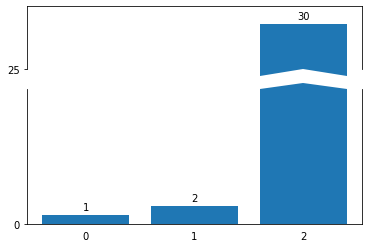

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
sns.histplot(binwidth=0.6, x="label", hue="label", data=Udp_protocol2, stat = "count", shrink=.2, common_norm=True)

ax.set_title('UDP protocol labels count')
plt.xticks(rotation=45)
plt.show()

### ICMP protocol

In [ ]:
%store -r ICMP_protocol3

In [ ]:
ICMP_protocol3

In [ ]:
%matplotlib inline
ax = plt.axes()
sns.histplot( x="label", hue="label", data=ICMP_protocol3, stat = "count", shrink=.1, common_norm=True)
ax.set_title('TCP protocol labels count')
plt.xticks(rotation=45)
plt.show()

### leave after this cell

In [ ]:
from sklearn.decomposition import PCA

reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udpfeatures)

In [ ]:
model_br = Birch(threshold=0.01, n_clusters=5)
clusters=model_br.fit(udpfeatures)


In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("UDP Brich clustering")
plt.legend()
plt.show()

## leave below cell

In [ ]:
udp_norm1= udp_norm.iloc[:, 0:2]
udp_norm2= udp_norm.iloc[:, [0,3]]
udp_norm3= udp_norm.iloc[:, [0,4]]
udp_norm4= udp_norm.iloc[:, [0,5]]
#udp_norm5= udp_norm.iloc[:, [0,6]]


In [ ]:
udp_normorig_bytes1= udp_norm.iloc[:, [1,2]]
udp_normorig_bytes2= udp_norm.iloc[:, [1,3]]
udp_normorig_bytes3= udp_norm.iloc[:, [1,4]]
udp_normorig_bytes4= udp_norm.iloc[:, [1,5]]

In [ ]:
udp_normresp_bytes1= udp_norm.iloc[:, [2,3]]
udp_normresp_bytes2= udp_norm.iloc[:, [2,4]]
udp_normresp_bytes3= udp_norm.iloc[:, [1,5]]


In [ ]:
udp_normconn_state1= udp_norm.iloc[:, [3,4]]
udp_normconn_state2= udp_norm.iloc[:, [3,5]]

In [ ]:
udp_normorig_pkts1=udp_norm.iloc[:, [4,5]]

In [ ]:
udp_normconn_state1

In [ ]:
udp_norm1w= udp_norm.iloc[:, 1:3]

In [ ]:
udp_norm2w=udp_norm.iloc[:, [1,3]]

In [ ]:
udp_norm2w

In [ ]:


def ad():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()


def addd():
    wss = []
    K = range(2,11)
    for k1 in K1:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def adddd():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def addddd():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm4)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes3():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes4():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes4)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes3():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def conn_state1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normconn_state1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def conn_state2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normconn_state2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()


def orig_pkts1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_pkts1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

In [ ]:
ad()

In [ ]:
conn_state1()

In [ ]:
conn_state2()

In [ ]:
orig_pkts1()

In [ ]:
resp_bytes1()

In [ ]:
resp_bytes2()

In [ ]:
resp_bytes3()

In [ ]:
orig_bytes1()

In [ ]:
orig_bytes2()

In [ ]:
orig_bytes3()

In [ ]:
orig_bytes4()

In [ ]:
ad()

In [ ]:
addd()

In [ ]:
adddd()

In [ ]:
addddd()

In [ ]:
def add():
    k_means = KMeans(n_clusters=5, init = 'k-means++')
    k_means.fit(udp_normconn_state1)
    y_kmeans= kmeans.fit_predict(udp_normconn_state1)
    print(y_kmeans)
    plt.figure(figsize=(10, 8))
    plt.scatter(udp_normconn_state1['conn_state'], udp_normconn_state1['orig_pkts'], c=k_means.labels_, s=100)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker=">", s=80) 
    plt.xlabel('conn_state')
    plt.ylabel('orig_pkts')
    plt.title('5 Cluster K-Means')
    plt.show()
    return y_kmeans
    

In [ ]:
add()

In [ ]:
def a():
    k_means = KMeans(n_clusters=5, init = 'k-means++', max_iter=300)
    k_means.fit(udp_normconn_state2)
    plt.figure(figsize=(10, 8))
    plt.scatter(udp_normconn_state2['conn_state'], udp_normconn_state2['resp_pkts'], c=k_means.labels_, s=200)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker=">", s=80) 
    plt.xlabel('conn_state')
    plt.ylabel('resp_pkts')
    plt.title('5 Cluster K-Means')
    plt.show()
   


In [ ]:
a()

In [ ]:

algorithm3 = (KMeans(n_clusters = 5, init='k-means++', max_iter=300))
algorithm3.fit(udp_normconn_state2)
Udp_protocol2['clusterlabel']= algorithm3.labels_


In [ ]:
seedfsd3= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(udp_normconn_state1)




plt.scatter(udp_normconn_state1[y_kmeans == 0]['conn_state'], udp_normconn_state1[y_kmeans == 0]['orig_pkts'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(udp_normconn_state1[y_kmeans == 1]['conn_state'], udp_normconn_state1[y_kmeans == 1]['orig_pkts'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(udp_normconn_state1[y_kmeans == 2]['conn_state'], udp_normconn_state1[y_kmeans == 2]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(udp_normconn_state1[y_kmeans == 3]['conn_state'], udp_normconn_state1[y_kmeans == 3]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 4')
plt.scatter(udp_normconn_state1[y_kmeans == 4]['conn_state'], udp_normconn_state1[y_kmeans == 4]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

In [ ]:
add()seedfsd

In [ ]:

Udp_protocol2['clusterlabel']= k_means.labels_

In [ ]:
np.unique(k_means.labels_)

In [ ]:
centers = k_means.cluster_centers_

centers

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(udp_norm2w['orig_bytes'], 
            udp_norm2w['conn_state'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=300) 

plt.xlabel('duration')
plt.ylabel('orig_bytes')
plt.title('5 Cluster K-Means')

plt.show()

In [ ]:
seedfsd3= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', 
                        random_state=123))
algorithm.fit(udp_norm1)
Udp_protocol2['clusterlabel']= algorithm.labels_

In [ ]:
Udp_protocol2

In [ ]:
for (columnName, columnData) in udp_norm.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    print('*** Iterate over columns in dataframe using Column Names ***"')


In [ ]:
columnSeriesObj

In [ ]:
for (columnName, columnData) in udp_norm.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    

In [ ]:
udp_norm1

In [ ]:
#da= udp_norm.iloc[0:5000]

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn import metrics

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(udp_norm)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(udp_norm.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [ ]:
wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(udp_norm)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

In [ ]:
def find_optimal_cluster_number_kmeans(udp_norm, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(udp_norm) 
        silhouette_score = metrics.silhouette_score(udp_norm, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [ ]:
find_optimal_cluster_number_kmeans(udp_norm, 2, 11, random_state=123)

In [ ]:
data1 = udp_norm.copy()

In [ ]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
#data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=5, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', 
                        random_state=123))
algorithm.fit(data1)
Udp_protocol2['clusterlabel']= algorithm.labels_

In [ ]:
%store -r Udp_protocol2

In [ ]:
seedfsd= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
seedfsd

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
from sklearn.cluster import Birch
from numpy import unique
model_br = Birch(threshold=0.02, n_clusters=3)
model_br.fit(tcp_norm)
#
yhat_br = model_br.predict(data1)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
Udp_protocol2['clusterlabel'] = model_br.labels_

In [ ]:
labels_br

In [ ]:
score_br = metrics.silhouette_score(data1,labels_br)

print("Score of Birch = ", score_br)

In [ ]:
Udp_protocol2

In [ ]:
seedfsd1= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
from sklearn.cluster import OPTICS
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data1)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

In [ ]:
labels_op

In [ ]:
score_op = metrics.silhouette_score(data1,labels_op)

print("Score of Mean Shift = ", score_op)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
model_mini = MiniBatchKMeans(n_clusters=3)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=5)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
score_mini = metrics.silhouette_score(data1,labels_mini)

print("Score of Birch = ", score_mini)

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=3)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
Udp_protocol2['clusterlabel'] = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
seedfsd2= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd2, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
from sklearn.cluster import MeanShift
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data1)
#
yhat_ms = model_ms.predict(data1)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_